In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [3]:
def conv(img,num_filters):
    global conv_last_input
    conv_last_input=img
    row,col=img.shape
    rpw=-2
    col-=2
    output_array=np.zeros((row,col,num_filters))
    for i in range(img.shape[0]-2):
        for j in range(img.shape[1]-2):
            temp_array=img[i:i+3,j:j+3]
            output_array[i,j]=np.sum(temp_array*num_filters,axis=(1,2))
    return output_array

In [4]:
img = cv2.imread("myface.jpg")

In [5]:
kernel1=[[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2]]
kernel2=[[2,2,2,2,2],[1,1,1,1,1],[0,0,0,0,0],[-1,-1,-1,-1,-1],[-2,-2,-2,-2,-2]]

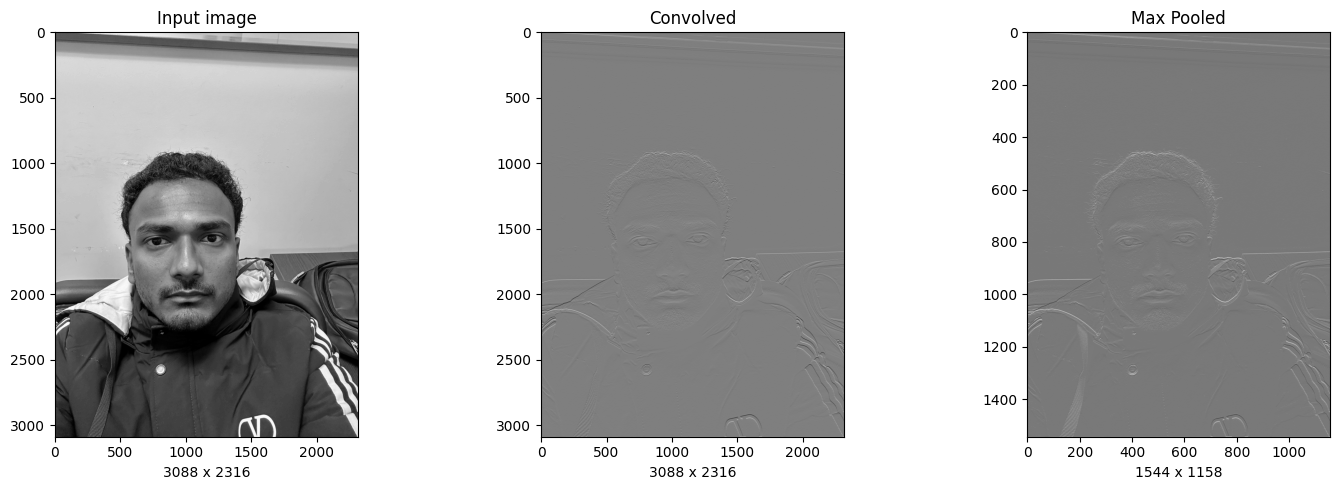

In [6]:
def conv(img, kernel):
    # Convert the kernel to a numpy array
    kernel = np.array(kernel)
    
    # Determine the pad width
    pad_size = kernel.shape[0] // 2
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size)), 'constant')
    
    # Initialize the output array
    r, c = img.shape
    output_array = np.zeros((r, c))
    
    # Perform the convolution
    for i in range(r):
        for j in range(c):
            temp_array = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output_array[i, j] = np.sum(temp_array * kernel)
    
    return output_array

def maxpool(img, size=2):
    # Initialize the output array
    r, c = img.shape
    output_array = np.zeros((r // size, c // size))
    
    # Perform the max pooling
    for i in range(0, r, size):
        for j in range(0, c, size):
            output_array[i // size, j // size] = np.amax(img[i:i+size, j:j+size])
    
    return output_array

# Assuming the uploaded image is grayscale
# Convert to grayscale just to make sure
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply the convolution and maxpool functions
convolved = conv(gray_img, kernel2)
maxpooled = maxpool(convolved)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(gray_img, cmap='gray')
axs[0].set_title('Input image')
axs[0].set_xlabel(f'{gray_img.shape[0]} x {gray_img.shape[1]}')

axs[1].imshow(convolved, cmap='gray')
axs[1].set_title('Convolved')
axs[1].set_xlabel(f'{convolved.shape[0]} x {convolved.shape[1]}')

axs[2].imshow(maxpooled, cmap='gray')
axs[2].set_title('Max Pooled')
axs[2].set_xlabel(f'{maxpooled.shape[0]} x {maxpooled.shape[1]}')

plt.tight_layout()
plt.show()
